# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

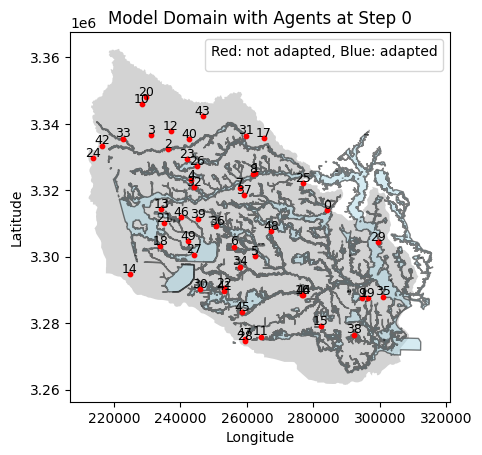

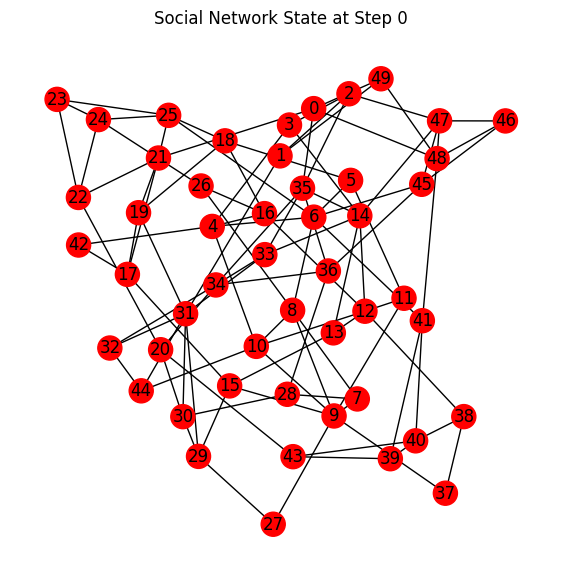

<Figure size 1000x600 with 0 Axes>

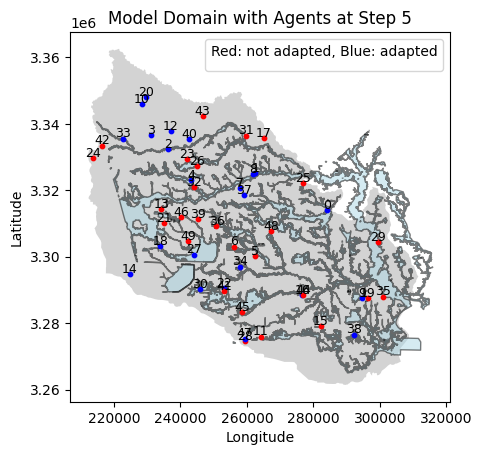

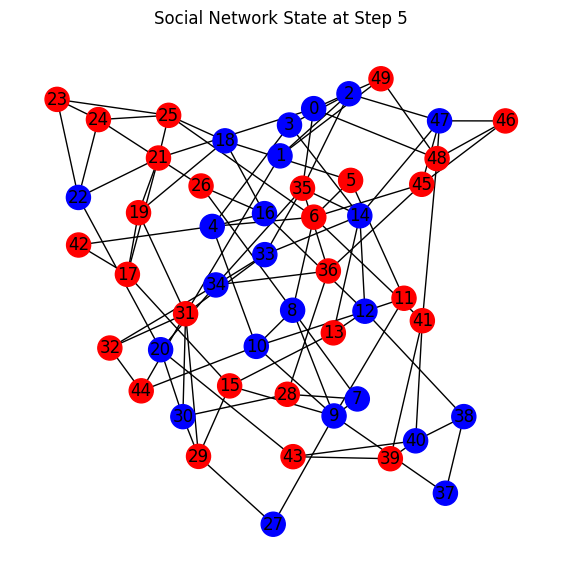

<Figure size 1000x600 with 0 Axes>

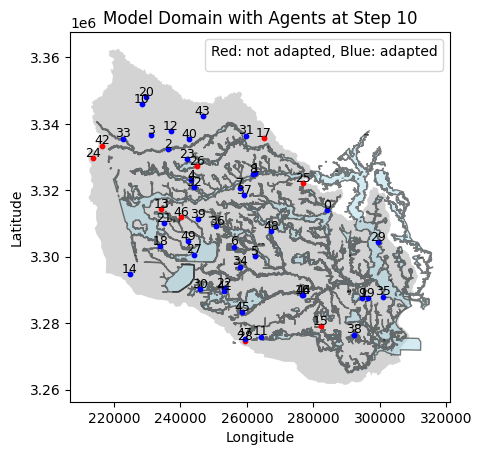

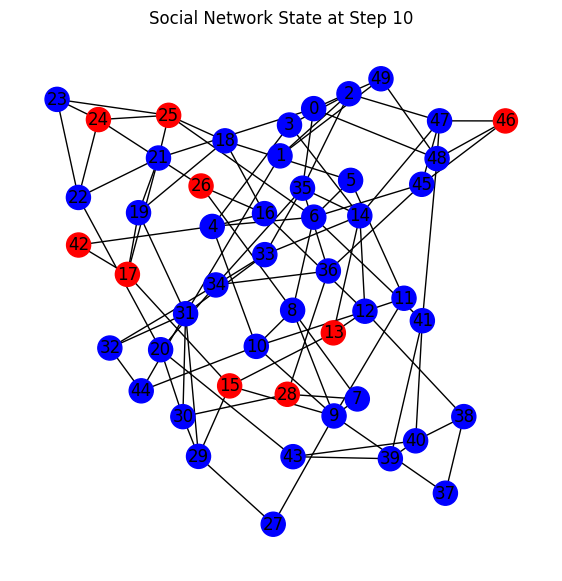

<Figure size 1000x600 with 0 Axes>

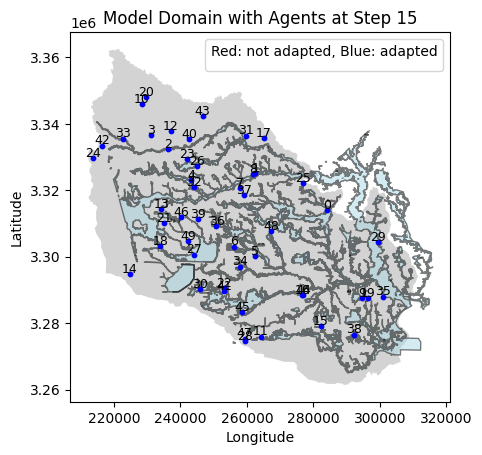

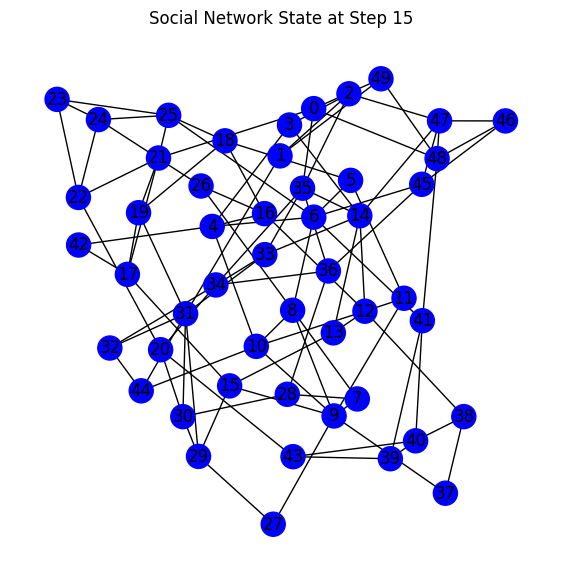

<Figure size 1000x600 with 0 Axes>

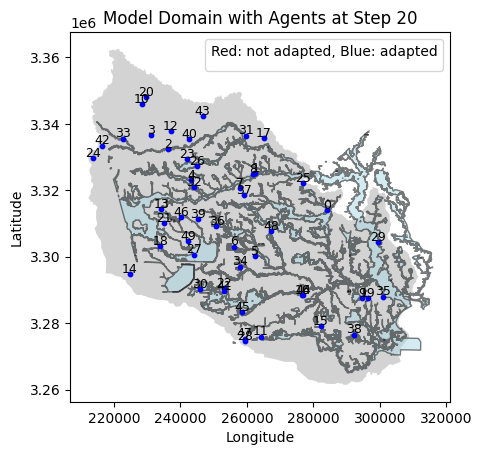

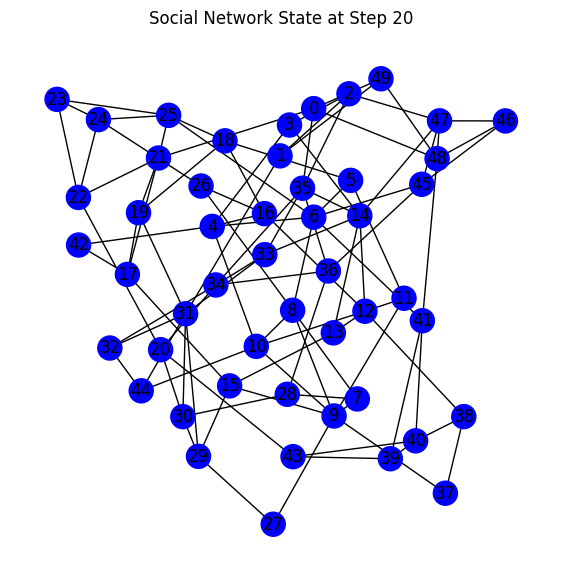

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42 network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen

result = [] 

for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)

In [3]:
import pandas as pd

In [4]:
result[0]['Worry'].groupby('Step').mean()

Step
0     0.135704
1     0.148361
2     0.176607
3     0.191938
4     0.223536
5     0.257051
6     0.269337
7     0.290353
8     0.299107
9     0.299457
10    0.315657
11    0.320658
12    0.305798
13    0.311625
14    0.307815
15    0.312200
16    0.313400
17    0.320000
18    0.326000
19    0.330800
Name: Worry, dtype: float64

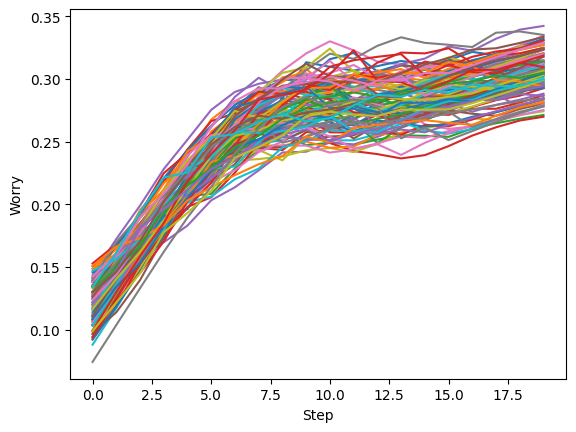

In [5]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())


In [6]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

16.019356140583685

In [7]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


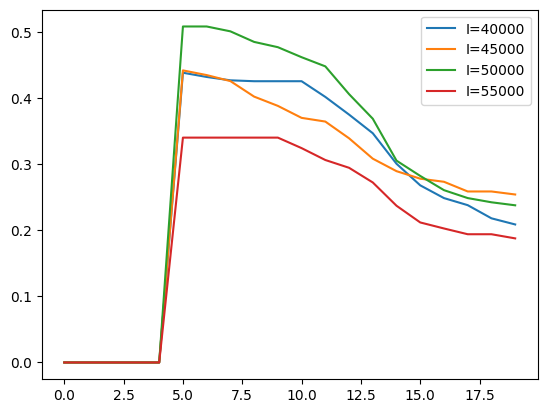

In [8]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [9]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.563265306122449

In [10]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

2.2448979591836733

In [11]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.32653061224489793

In [12]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

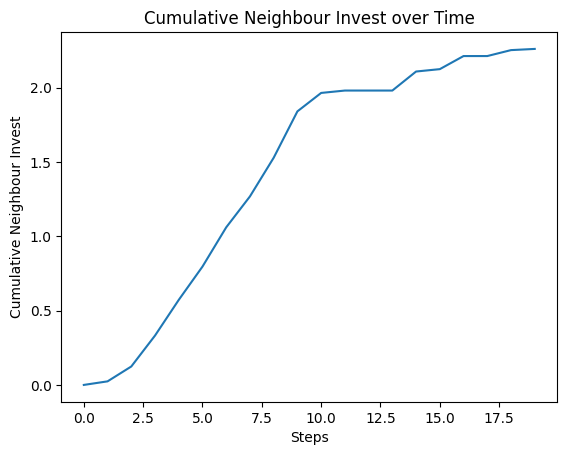

In [13]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

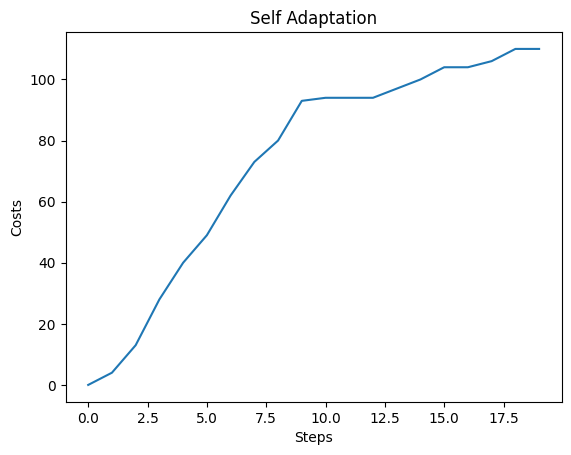

In [14]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

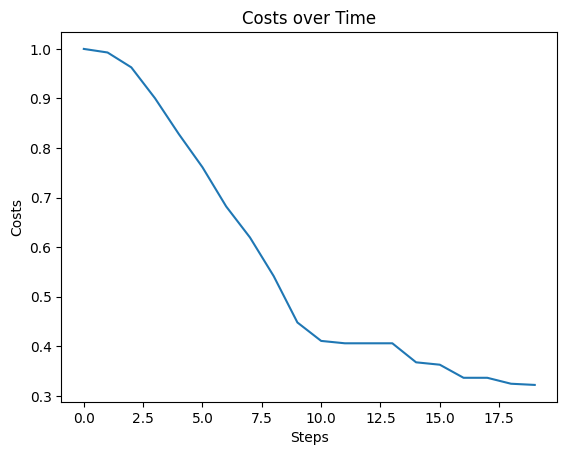

In [15]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

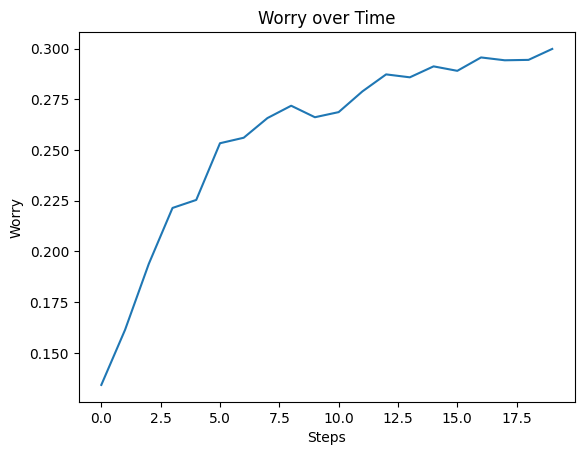

In [16]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

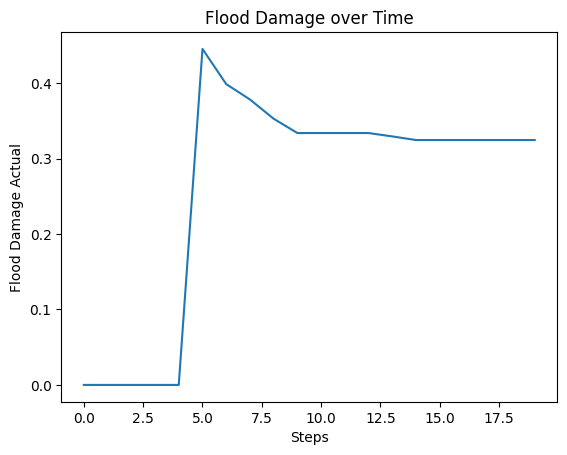

In [17]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [18]:
import pandas as pd

In [19]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

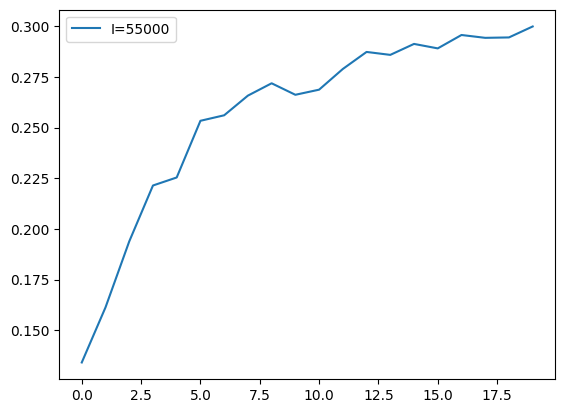

In [20]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

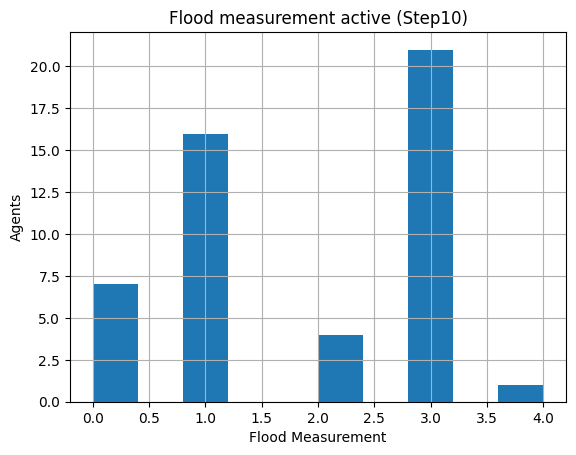

In [21]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

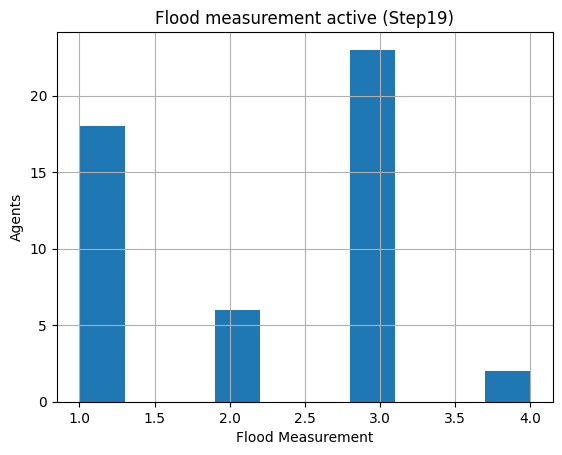

In [22]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

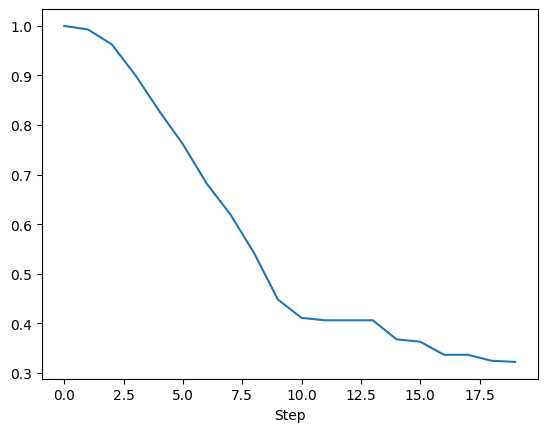

In [23]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [24]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.909544              0.631746          0.604969   
     1                   0.755407              0.599325          0.562368   
     2                   0.271503              0.420660          0.158856   
     3                   0.000000              0.000000          0.000000   
     4                   2.726290              0.823414          1.904952   
     5                   0.000000              0.000000          0.000000   
     6                  17.457685              1.000000         20.940355   
     7                   0.432027              0.501764          0.473884   
     8                   0.000000              0.000000          0.000000   
     9                   4.777325              0.921354          3.540592   
     10                  0.000000              0.000000          0.000000   
     11                  0.514565              0.532290          0.370713   
     12                  1.205585              0.680944          0.890191   
     13                  4.378212              0.906121          2.778566   
     14                  1.223804              0.683563          1.452147   
     15                  0.535089              0.539119          0.286641   
     16                  0.000000              0.000000          0.000000   
     17                  0.187702              0.356212          0.147196   
     18                  0.253269              0.408521          0.299860   
     19                  0.399706              0.488187          0.375984   
     20                  0.158455              0.326637          0.115742   
     21                  0.960848              0.641327          0.998158   
     22                  0.957401              0.640699          0.728086   
     23                  0.712233              0.589049          0.362319   
     24                  1.246578              0.686782          0.665738   
     25                  0.229210              0.391094          0.192208   
     26                  0.463768              0.514142          0.538001   
     27                  1.537828              0.723443          1.216790   
     28                  1.918500              0.762060          1.610173   
     29                  0.445538              0.507140          0.504001   
     30                  0.379570              0.479162          0.349730   
     31                  0.000000              0.000000          0.000000   
     32                  1.294574              0.693378          0.760093   
     33                  0.778234              0.604523          0.869420   
     34                  0.171848              0.340804          0.206069   
     35                  0.000000              0.000000          0.000000   
     36                  0.000000              0.000000          0.000000   
     37                  0.864674              0.622913          0.466643   
     38                  0.000000              0.000000          0.000000   
     39                  0.150509              0.317654          0.078712   
     40                  2.577728              0.813630          1.363397   
     41                  0.838626              0.617572          0.895167   
     42                  0.000000              0.000000          0.000000   
     43                  2.412766              0.802083          2.061390   
     44                  0.353001              0.466492          0.311043   
     45                  0.509711              0.530635          0.347976   
     46                  0.479610              0.520007          0.533674   
     47                  2.076408              0.775870          1.837102   
     48                  0.897869              0.629490          0.538679   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

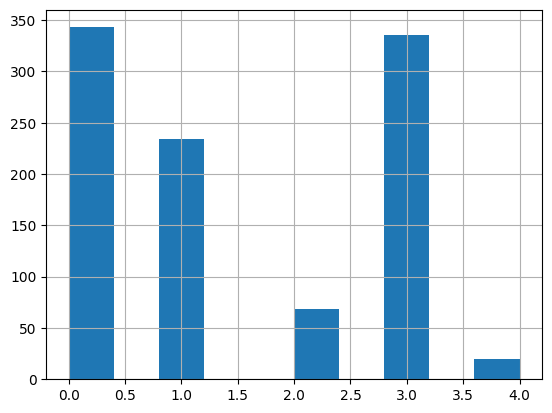

In [25]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [26]:
agent_data['FriendsCount']

Step  AgentID
0     0          4
      1          5
      2          4
      3          3
      4          2
                ..
19    45         5
      46         5
      47         5
      48         5
      49         4
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

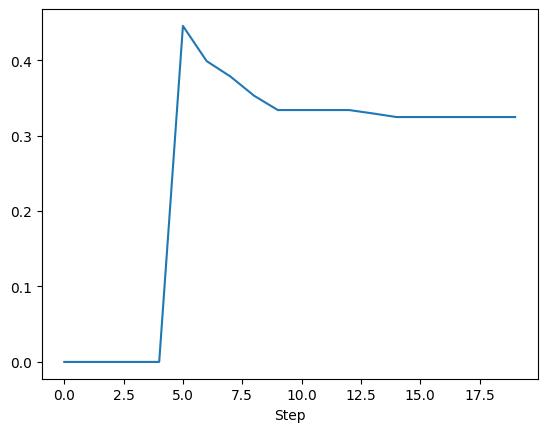

In [27]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

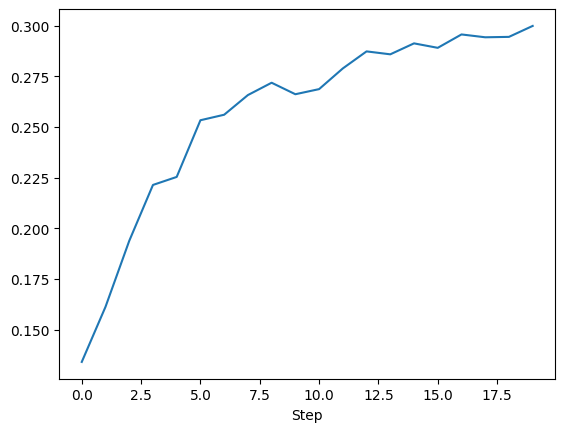

In [28]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [29]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.024
2     0.048
3     0.108
4     0.180
5     0.204
6     0.292
7     0.348
8     0.400
9     0.468
10    0.484
11    0.484
12    0.484
13    0.512
14    0.520
15    0.544
16    0.544
17    0.556
18    0.560
19    0.560
Name: Self_Investment, dtype: float64

In [30]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.326925635522116

In [31]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.3363882661744841

In [32]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.35572238495162806

In [33]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,2
2,5
3,11
4,17
5,20
6,27
7,32
8,36
9,42
